### Demonstration of the TAE algorithm
#### The TAE is compared with other envelope extractors like cepstral smoothing and LPC

In [1]:
import numpy as np
import matplotlib.pyplot as pyp
import essentia.standard as ess
import essentia
import IPython.display as ipd
import func_envs as fe

In [4]:
audio_locn = './audio_example.wav'
audio = ess.MonoLoader(sampleRate = fs, filename = audio_locn)()
ipd.Audio(audio, rate=fs)

In [20]:
# Cepstral Envelope
fft_size = 2048
window = 'hann'
fs = 16000
f0 = 440
num_coeff = 20
choice = 2
choice_inp = 0
inp = audio[1000:1000 + fft_size]
ceps_env = fe.ceps_envelope(inp,fft_size,window,fs,f0,num_coeff,choice,choice_inp)

# LPC Envelope
M = 10
freq_size = 2048
lpc_env = fe.lpc_envelope(inp,M,fs,freq_size)

# True Envelope
fft_size = 2048
thresh = 0.1
# The number of coefficients is chosen according to the formula (fs/2*f0), similar to the number of coefficients chose in the cepstrum
num_coeff = 20
stopping_iters = 10000
tae_env = fe.calc_true_envelope(inp,fft_size,thresh,num_coeff,stopping_iters)


<IPython.core.display.Javascript object>


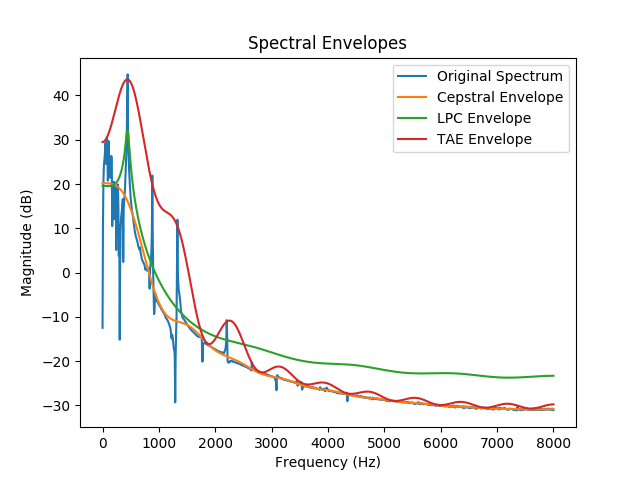

In [21]:
%matplotlib notebook
# Comparison of the spectra
pyp.figure()
pyp.title('Spectral Envelopes')
pyp.xlabel('Frequency (Hz)')
pyp.ylabel('Magnitude (dB)')
f_Hz = np.arange(fft_size)*(fs/fft_size)
pyp.plot(f_Hz[:fft_size//2 + 1],20*np.log10(np.abs(np.fft.fft(inp)))[:fft_size//2 + 1],label = 'Original Spectrum')
pyp.plot(f_Hz[:fft_size//2 + 1],20*ceps_env[0][:fft_size//2 + 1],label = 'Cepstral Envelope')
pyp.plot(f_Hz[:fft_size//2 + 1],20*lpc_env[:fft_size//2 + 1]/20,label = 'LPC Envelope')
pyp.plot(f_Hz[:fft_size//2 + 1],20*tae_env[0][:fft_size//2 + 1],label = 'TAE Envelope')
pyp.legend()
pyp.show()